In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
df = pd.read_csv("../data/creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Target balance check
df['Class'].value_counts(normalize=True) * 100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

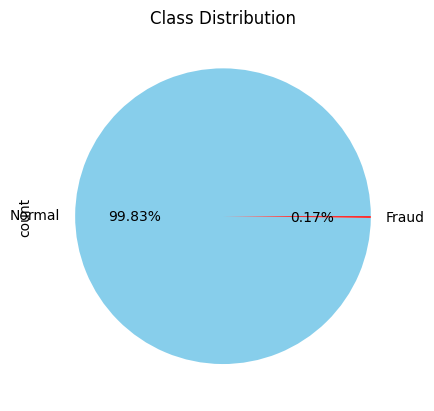

In [7]:
# Pie chart: Normal vs Fraud
df['Class'].value_counts().plot.pie(autopct='%1.2f%%', labels=['Normal','Fraud'], colors=['skyblue','red'])
plt.title("Class Distribution")
plt.show()

Text(0.5, 1.0, 'Fraud vs Normal by Hour')

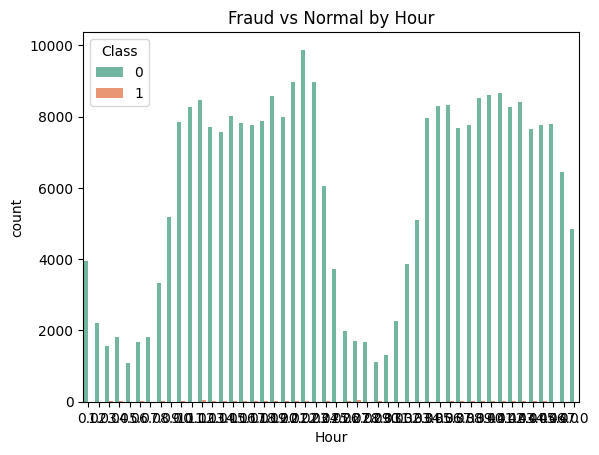

In [8]:
# transactions by the hour
df['Hour'] = df['Time'] // 3600
sns.countplot(data=df, x='Hour', hue='Class', palette='Set2')
plt.title("Fraud vs Normal by Hour")

Text(0.5, 1.0, 'Amount Distribution')

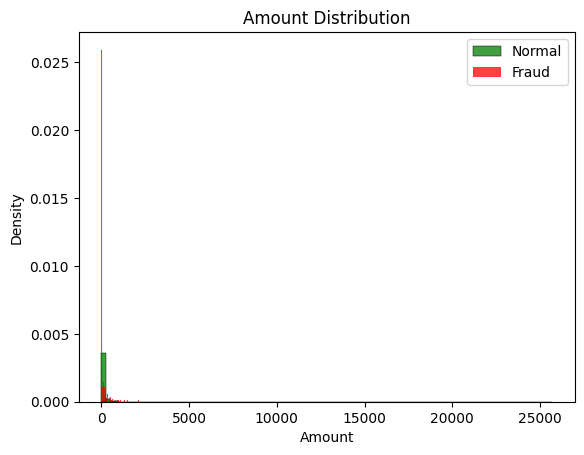

In [9]:
# Amount distribution
sns.histplot(df[df['Class']==0]['Amount'], bins=100, color='green', label='Normal', stat='density')
sns.histplot(df[df['Class']==1]['Amount'], bins=100, color='red', label='Fraud', stat='density')
plt.legend()
plt.title("Amount Distribution")

In [10]:
# Scaling the Amount column
scaler = StandardScaler()
df['normAmount'] = scaler.fit_transform(df[['Amount']])
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [11]:
# Ma’lumotni ajratish
x = df.drop('Class', axis=1)
y = df['Class']

In [12]:
x = df.drop('Class', axis=1)
y = df['Class']

# Stratify to maintain balance by target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


In [13]:
# train model
model = IsolationForest(contamination=0.005, random_state=42)
model.fit(x_train)

,n_estimators,100
,max_samples,'auto'
,contamination,0.005
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [14]:
y_pred = model.predict(x_test)

# -1 → anomaly (fraud), 1 → normal
y_pred = [1 if x == -1 else 0 for x in y_pred]

In [15]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

Confusion Matrix:
[[56597   267]
 [   46    52]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9992    0.9953    0.9972     56864
           1     0.1630    0.5306    0.2494        98

    accuracy                         0.9945     56962
   macro avg     0.5811    0.7630    0.6233     56962
weighted avg     0.9977    0.9945    0.9960     56962



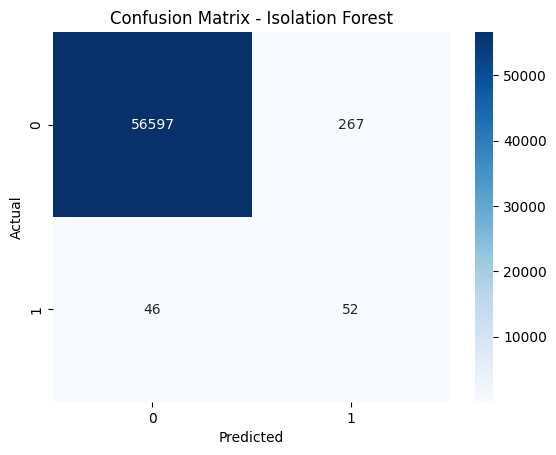

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Isolation Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()